# Hypothesis:


## I think that students with an intended major/minor in Computer Science will have a higher average of >=5 ratings on whether or not they would recommend the course to other students than those who do not intend to major in Computer Science.

### These two simple lines of code will automatically reload imported modules.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Abdulaziz Al-Shayef
__author__ = "730397680"

# Organize Data

### My first step before I can begin to mess around with my data is to read in the survey data from class and then convert that data into a column-oriented table.

In [3]:
from data_utils import read_csv_rows, columnar

rows_of_data: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
column: dict[str, list[str]] = columnar(rows_of_data)

## Now we have our data structured and able to be worked with

### In the next cell of code I will first use the select funciton to produce a new column-oriented table that will only include the dats sets "comp_major" and "would_recommend".
### I will also use the head funciton to produce the first 10 rows of the data so we can get a general sense of the data we are working with.

In [4]:
from data_utils import select, head

specific_column: dict[str, list[str]] = select(column, ["comp_major", "would_recommend"])
head(specific_column, 10)

{'comp_major': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
 'would_recommend': ['7', '7', '7', '7', '7', '4', '6', '4', '6', '5']}

## UH OH!
### I don't know if you caught it or not but there are ratings that are <5 and don't forget that the hypothesis is focusing on ratings >=5 which means that I will have to use helper functions in order to filter out all ratings <5.

### I have defined a funciton named high_ratings in the next cell of code that will produce a boolean list that will correspond all ratings <5 with False, and all ratings >=5 with True.
### I also only printed the first 20 indecies in the list to keep the project looking clean.

In [5]:
def high_ratings(ratings: list[str], requirement: int) -> list[bool]:
    """A helper function that will filter out all ratings that are >5."""
    filtered_list: list[bool] = []
    for rating in ratings:
        rating = int(rating)
        filtered_list.append(rating >= requirement)

    return filtered_list

rates: list[bool] = high_ratings(specific_column["would_recommend"], 5)
print(rates[0:20])

[True, True, True, True, True, False, True, False, True, True, False, False, True, True, True, True, True, True, False, False]


### Now we can use another helper function which I defined as filter which will eliminate any data from the subset comp_major that does not have a rating >=5 on whether or not they would recommend the class to other students. 
### Same as before I only printed the first 20 indecies in the list to keep a visual appeal to the project.

In [6]:
def filter(ratings: list[str], filtered: list[bool]) -> list[str]:
    """A helper function that will eliminate all data that is <5."""
    filtered_list: list[str] = []
    for n in range(len(filtered)):
        if filtered[n]:
            filtered_list.append(ratings[n])

    return filtered_list


ratings_5_or_greater: list[str] = filter(specific_column["comp_major"], rates)
print(ratings_5_or_greater[0:20])

['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes - Minor', 'No', 'No']


## We now have a list that contains lots of Yes's and No's. Thanks to the helper functions we know that all of these students gave a rating of 5-7 on whether or not they would recommend the class to other students. 

# Computation with new Data Sets



### Our next step with this project is to use the count function to tally up all the Yes's and No's in order to compute our averages and compare the two. However, before we do that, I have implemeneted a small helper function defined as label and all it will do is relabel the Yes's as "CS Path Student" and No's as "Non-CS Path Student". This is because our hypothesis groups up the students who intend to major/minor in Computer Science into one group.

In [7]:
def label(students: list[str]) -> list[str]:
    """A simple helper function that will just relabel our students in order to read the data easier."""
    labeled: list[str] = []
    for student in students:
        if student == "No":
            labeled.append("Non-CS Path Student")
        else:
            labeled.append("CS Path Student")

    return labeled


labeled_students: list[str] = label(ratings_5_or_greater)
print(labeled_students[0:20])

['Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student', 'CS Path Student', 'Non-CS Path Student', 'Non-CS Path Student']


### Now we are going to use the count function to tally up how many 'CS Path Students' and 'Non-CS Path Students' rated the class >=5 on whether or not they would recommend it to other students.

In [8]:
from data_utils import count

tally = count(labeled_students)

tally

{'Non-CS Path Student': 267, 'CS Path Student': 156}

## We are so close to our final destination! 
### Now we will quickly use the count function to count total amount of CS Path Students and total amount of Non-CS Path Students.


In [9]:
total = count(specific_column['comp_major'])

total

{'No': 404, 'Yes - Minor': 33, 'Yes - BS': 88, 'Yes - BA': 48}

## LAST STEP!
### We will now compute the average for CS Path Students who gave a rating of >=5 on whether or not they would recommend the class to other students with all CS Path Students.
### We will also compute the average for Non-CS Path students who gave a rating of >=5 on whether or not they would recommend the class to other students with all Non-CS Path Students. 
### I will then write an if-else print statement for the possibility of either average being higher than the other. 

In [10]:
cs_path_5_up: float = tally['CS Path Student']
cs_path_all: float = total['Yes - Minor'] + total['Yes - BS'] + total['Yes - BA']
cs_path_average: float = round((cs_path_5_up / cs_path_all) * 100, 1)

non_cs_path_5_up: float = tally['Non-CS Path Student']
non_cs_path_all: float = total['No']
non_cs_path_average: float = round((non_cs_path_5_up / non_cs_path_all) * 100, 1)

print(f"The average rating for CS Path Students rating the class >=5 as a recommendation to other students is {cs_path_average}%")
print(f"The average rating for Non-CS Path Students rating the class >=5 as a recommendation to other students is {non_cs_path_average}%")

if cs_path_average > non_cs_path_average:
    print("CS Path Students have a higher average >=5 ratings when it comes to recommending the class to other students compared to Non-CS Path Students.")
else:
    print("Non-CS Path Students have a higher average >=5 ratings when it comes to recommending the class to other students compared to CS Path Students.")

The average rating for CS Path Students rating the class >=5 as a recommendation to other students is 92.3%
The average rating for Non-CS Path Students rating the class >=5 as a recommendation to other students is 66.1%
CS Path Students have a higher average >=5 ratings when it comes to recommending the class to other students compared to Non-CS Path Students.


# Visuals

### In this next cell of code I will be using the seaborn function to put our information onto a bar plot to get a visual sense of the comparison of our data.

In [11]:
import seaborn

<AxesSubplot:>

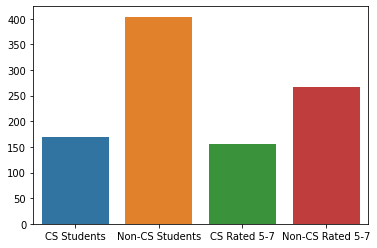

In [12]:
seaborn.barplot(x=["CS Students", "Non-CS Students", "CS Rated 5-7", "Non-CS Rated 5-7"], y=[cs_path_all, non_cs_path_all, cs_path_5_up, non_cs_path_5_up])

# Conclusion


### In conclusion 92.3% of students who plan to major/minor in Computer Scince rated the class a 5-7 on whether or not they would recommend the course to other students. 66.1% of students who do not have an intention of pursuing a major/minor in Computer Scinece rated the class a 5-7 on whether or not they would recommend the course to other students. This concludes that students with an intended Computer Science Path have a higher average of ratings that fall between 5-7 comparted to students that do not intend to stay on the Computer Science path. This drastic difference of 26.2% most likely comes from the fact that most non Comp Sci students that are required to take Comp 110 feel as if the class has no relevance to their major. 

### Now an interesting question that came to my mind is would the 33.9% of Non-CS Path Students who had a low rating on whether or not they would recommend the class to other students line up pretty equally with the data on their thoughts of the pace of the class, whether or not the class is interesting, or the difficulty of the class.